In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

         DATE      SP500  NASDAQ.AAL  NASDAQ.AAPL  NASDAQ.ADBE  NASDAQ.ADI  \
0  1491226200  2363.6101     42.3300     143.6800     129.6300      82.040   
1  1491226260  2364.1001     42.3600     143.7000     130.3200      82.080   
2  1491226320  2362.6799     42.3100     143.6901     130.2250      82.030   
3  1491226380  2364.3101     42.3700     143.6400     130.0729      82.000   
4  1491226440  2364.8501     42.5378     143.6600     129.8800      82.035   

   NASDAQ.ADP  NASDAQ.ADSK  NASDAQ.AKAM  NASDAQ.ALXN  ...  NYSE.WYN  NYSE.XEC  \
0    102.2300      85.2200       59.760       121.52  ...    84.370   119.035   
1    102.1400      85.6500       59.840       121.48  ...    84.370   119.035   
2    102.2125      85.5100       59.795       121.93  ...    84.585   119.260   
3    102.1400      85.4872       59.620       121.44  ...    84.460   119.260   
4    102.0600      85.7001       59.620       121.60  ...    84.470   119.610   

   NYSE.XEL  NYSE.XL  NYSE.XOM  NYSE.XRX  NY

<ipython-input-5-a36a6642c2a7>:12: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = stocks.set_index('DATE').pct_change().dropna()


Stocks clustered by performance:
            Stock  Cluster
0          SP500        4
1     NASDAQ.AAL        4
2    NASDAQ.AAPL        4
3    NASDAQ.ADBE        4
4     NASDAQ.ADI        4
..           ...      ...
496     NYSE.XRX        4
497     NYSE.XYL        4
498     NYSE.YUM        4
499     NYSE.ZBH        4
500     NYSE.ZTS        4

[501 rows x 2 columns]


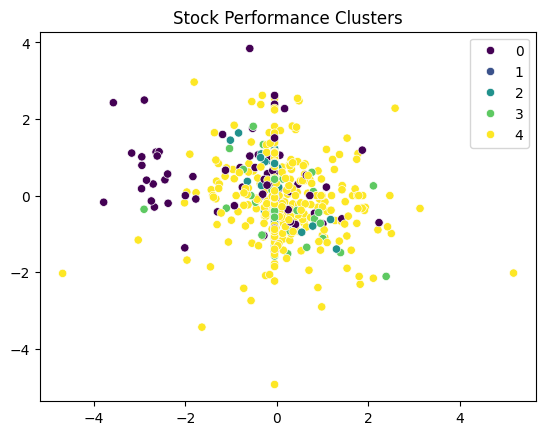

Number of unique patterns based on fluctuations: 0


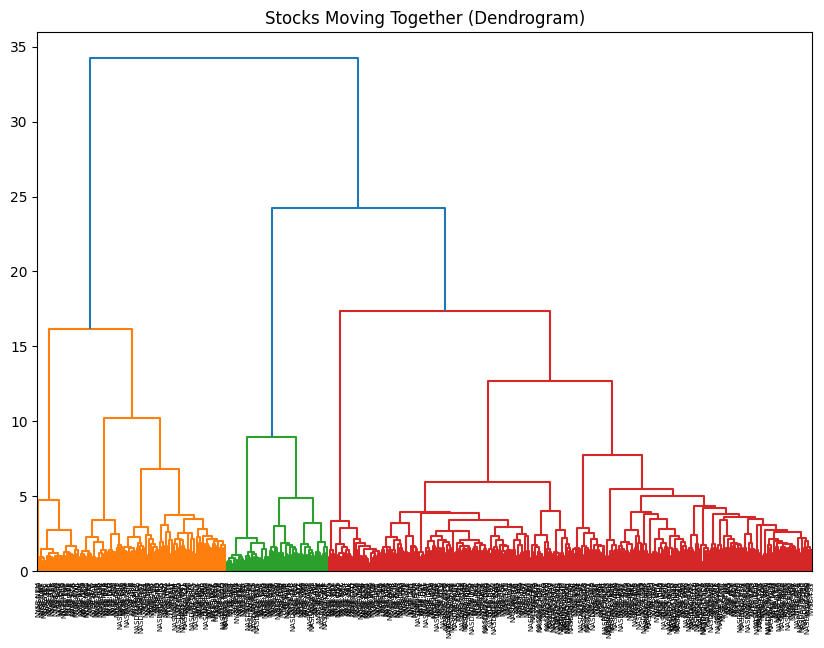

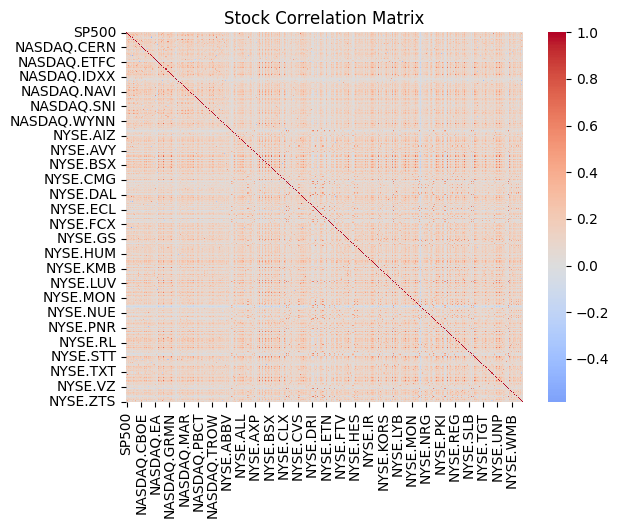

In [5]:
# Load data
data_url = '/content/data_stocks.csv'
stocks = pd.read_csv(data_url)

# Display dataset structure to understand the column names and layout
print(stocks.head())

# Assuming 'Date' is a column and each other column is a stock symbol with prices.

# Problem 1: Identify Similar Stocks
# Set the correct column name for the index and calculate returns
returns = stocks.set_index('DATE').pct_change().dropna()

# Standardize returns data for clustering
scaler = StandardScaler()
scaled_returns = scaler.fit_transform(returns.T)  # Transpose to cluster by stocks

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(scaled_returns)

# Assign cluster labels to stocks
stocks_clusters = pd.DataFrame({'Stock': returns.columns, 'Cluster': clusters})
print("Stocks clustered by performance:\n", stocks_clusters)

# Visualize clusters
sns.scatterplot(x=scaled_returns[:, 0], y=scaled_returns[:, 1], hue=clusters, palette='viridis')
plt.title("Stock Performance Clusters")
plt.show()

# Problem 2: Counting Unique Patterns in Fluctuations
# Apply KMeans again or use DBSCAN for pattern recognition
dbscan = DBSCAN(eps=0.5, min_samples=5)
patterns = dbscan.fit_predict(scaled_returns)

unique_patterns_count = len(set(patterns)) - (1 if -1 in patterns else 0)
print("Number of unique patterns based on fluctuations:", unique_patterns_count)

# Problem 3: Identify Stocks Moving Together vs Differently
# Calculate correlation matrix
correlation_matrix = returns.corr()

# Apply hierarchical clustering on correlation matrix
linked = linkage(correlation_matrix, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=correlation_matrix.columns, leaf_rotation=90)
plt.title("Stocks Moving Together (Dendrogram)")
plt.show()

# Visualize correlation matrix as a heatmap
sns.heatmap(correlation_matrix, cmap="coolwarm", center=0)
plt.title("Stock Correlation Matrix")
plt.show()